# 0. Import the libraries you will need to use; do any other set ups


In [1]:
#imports
from bs4 import BeautifulSoup
import requests
import time
from datetime import datetime
import re
import pandas as pd

#set ups
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:

#visit the webpage https://www.hellenicparliament.gr/Vouli-ton-Ellinon/To-Politevma/Ekloges/Eklogika-apotelesmata-New/
response = requests.get('https://www.hellenicparliament.gr/Vouli-ton-Ellinon/To-Politevma/Ekloges/Eklogika-apotelesmata-New/', ) 
response

<Response [200]>

In [3]:
#parse the webpage
soup = BeautifulSoup(response.text, 'html.parser')
soup


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">

<html lang="el" xml:lang="el" xmlns="http://www.w3.org/1999/xhtml">
<head id="ctl00_Head1"><title>
	Εκλογικά Αποτελέσματα
</title><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="text/css" http-equiv="Content-Style-Type"/>
<link href="/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/><link href="/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
<script async="" src="https://www.googletagmanager.com/gtag/js?id=G-J6Y35P172L"></script>
<script>  
    if (getCookie('agreeToCookies') == '1') {
        window.dataLayer = window.dataLayer || [];
        function gtag() { dataLayer.push(arguments); }
        gtag('js', new Date()); gtag('config', 'G-J6Y35P172L');
    }

    function getCookie(cname) {
        var name = cname + "=";
        var decodedCookie = decodeURIComponent(document.cookie);
        var ca = decodedCoo

# 1. Starting from this [webpage](https://www.hellenicparliament.gr/Vouli-ton-Ellinon/To-Politevma/Ekloges/Eklogika-apotelesmata-New/), collect plenary data for the most recent 5 parliamentary periods (June 2012 onwards).

### You should end up with a df, which will include historical data for all parliamentary plenaries since June 2012. It will look like the screenshot below.
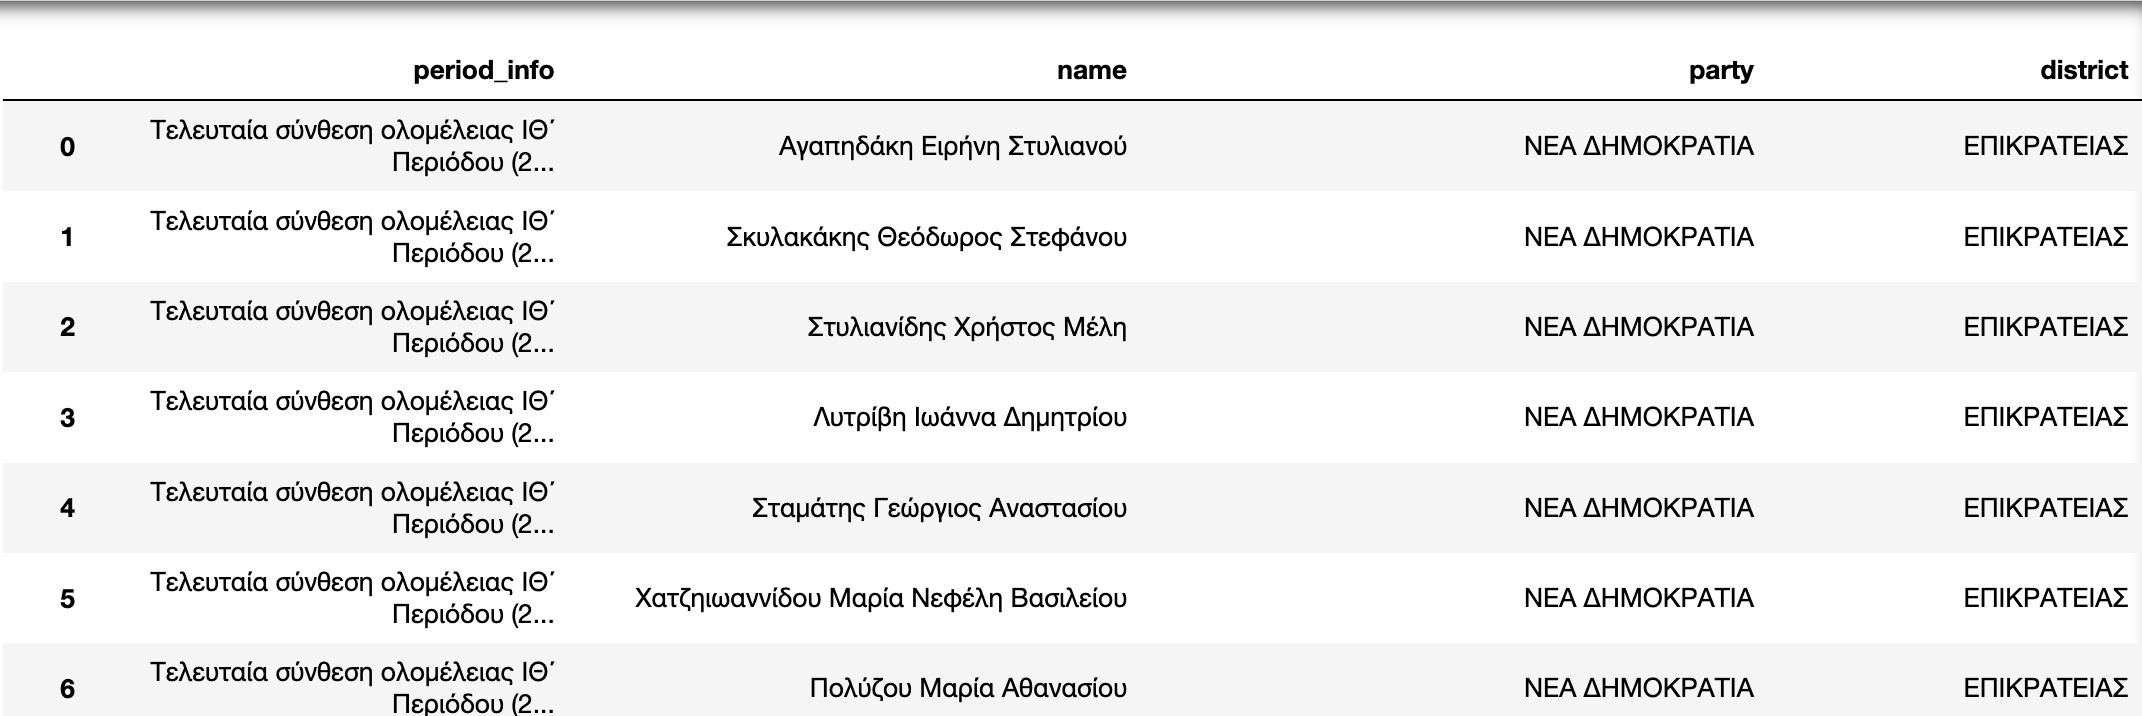

In [4]:
#Scrape the urls that direct to internal pages of information on plenaries of different parliamentary periods
more_urls = []

for p in soup.find_all('p'):
    if 'Σύνθεση' in p.text:
        url = p.find('a',href=True).get('href')
        print(url)

        more_urls.append(url)


https://www.hellenicparliament.gr/UserFiles/f3c70a23-7696-49db-9148-f24dce6a27c8/1822-1935.pdf
https://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=d99ba1dd-1aa5-4a8f-bcfb-b01001216db7
https://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=582fe843-04c4-481c-a03b-ac4f00c216c4
https://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=2b3e9c1b-c9df-4c81-b1eb-a52500a1abe6
http://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=fe646443-00d5-449d-aa0b-a43300be610f
http://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=6553b710-a52f-4971-97c6-8a3b37dee86f
http://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=157b1a03-d6b9-489a-9210-03a

In [5]:
#store the urls you need in a temporary df
#turn part of your more_urls list into a df (all urls but the first one, which we don't need)
temp_df = pd.DataFrame(more_urls[1:])

#rename your first column
temp_df = temp_df.rename(columns={temp_df.columns[0]:'url'})

#check out your df
temp_df.head()

,url
0,https://www.hellenicparliament.gr/Organosi-kai...
1,https://www.hellenicparliament.gr/Organosi-kai...
2,https://www.hellenicparliament.gr/Organosi-kai...
3,http://www.hellenicparliament.gr/Organosi-kai-...
4,http://www.hellenicparliament.gr/Organosi-kai-...


In [6]:
#loop through your urls and print them to see how they look like
for url in temp_df.url:
    print(url)
    

https://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=d99ba1dd-1aa5-4a8f-bcfb-b01001216db7
https://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=582fe843-04c4-481c-a03b-ac4f00c216c4
https://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=2b3e9c1b-c9df-4c81-b1eb-a52500a1abe6
http://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=fe646443-00d5-449d-aa0b-a43300be610f
http://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=6553b710-a52f-4971-97c6-8a3b37dee86f
http://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=157b1a03-d6b9-489a-9210-03a58cfda0ad
http://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoume

In [7]:
#some urls lack the 'www.hellenicparliament.gr' which is needed; we' ll fix it!

#ok, let's define the base of our desired urls
base_url = 'http://www.hellenicparliament.gr'

In [8]:
temp_df['final_url'] = ''

#iterrate over the rows in your df
for i, item in temp_df.iterrows():
    #if 'hellenicparliament.gr' is already part of your url
    if 'hellenicparliament.gr/' in item['url']: 
        #then you are all set, so your final_url will be equal to the one you already have
        temp_df.at[i, 'final_url'] = item['url']
    #otherwise
    else:
        #we'll construct your final_url by adding your current url to the base_url
        temp_df.at[i, 'final_url'] = base_url+item['url']

In [9]:
temp_df


,url,final_url
0,https://www.hellenicparliament.gr/Organosi-kai...,https://www.hellenicparliament.gr/Organosi-kai...
1,https://www.hellenicparliament.gr/Organosi-kai...,https://www.hellenicparliament.gr/Organosi-kai...
2,https://www.hellenicparliament.gr/Organosi-kai...,https://www.hellenicparliament.gr/Organosi-kai...
3,http://www.hellenicparliament.gr/Organosi-kai-...,http://www.hellenicparliament.gr/Organosi-kai-...
4,http://www.hellenicparliament.gr/Organosi-kai-...,http://www.hellenicparliament.gr/Organosi-kai-...
5,http://www.hellenicparliament.gr/Organosi-kai-...,http://www.hellenicparliament.gr/Organosi-kai-...
6,http://www.hellenicparliament.gr/Organosi-kai-...,http://www.hellenicparliament.gr/Organosi-kai-...
7,/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Pr...,http://www.hellenicparliament.gr/Organosi-kai-...
8,/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Pr...,http://www.hellenicparliament.gr/Organosi-kai-...
9,/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Pr...,http://www.hellenicparliament.gr/Organosi-kai-...


In [10]:
for f in temp_df.final_url:
    print(f)

https://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=d99ba1dd-1aa5-4a8f-bcfb-b01001216db7
https://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=582fe843-04c4-481c-a03b-ac4f00c216c4
https://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=2b3e9c1b-c9df-4c81-b1eb-a52500a1abe6
http://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=fe646443-00d5-449d-aa0b-a43300be610f
http://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=6553b710-a52f-4971-97c6-8a3b37dee86f
http://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=157b1a03-d6b9-489a-9210-03a58cfda0ad
http://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoume

In [11]:
numbers = list(range(1,16))

for n in numbers:
    print(n)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [12]:
ending = '&pageNo='

In [13]:


webpages = []
max_webpages = 75
count = 0 
ending = '&pageNo='


numbers = list(range(1, 16))


for url in temp_df.final_url:
    for n in numbers:
        if count >= max_webpages:
            break
        
        webpage = url + ending + str(n)
        webpages.append(webpage)
        count += 1

    if count >= max_webpages:
        break
        webpages.append(webpage)
 ###φαντάζομαι πως αυτός δεν είναι ο σωστός τρόπος για να κρατήσω τις ιστοσελίδες που
###αφορούν τον Ιούνιο 2012 και έπειτα, αλλά πραγματικά δεν μπορούσα να βρω κανέναν άλλον τρόπο,
###και ήθελα να προχωρήσω την εργασία





In [14]:
print(webpages)

['https://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=d99ba1dd-1aa5-4a8f-bcfb-b01001216db7&pageNo=1', 'https://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=d99ba1dd-1aa5-4a8f-bcfb-b01001216db7&pageNo=2', 'https://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=d99ba1dd-1aa5-4a8f-bcfb-b01001216db7&pageNo=3', 'https://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=d99ba1dd-1aa5-4a8f-bcfb-b01001216db7&pageNo=4', 'https://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=d99ba1dd-1aa5-4a8f-bcfb-b01001216db7&pageNo=5', 'https://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=d99ba1dd-1aa5-4a8f-bcfb-b01001216db7&pageNo=6', 'https://

In [15]:
len(webpages)

75

In [16]:
#turn this list into a df
df = pd.DataFrame(webpages)
#rename your first column
df = df.rename(columns={df.columns[0]:'webpage'})
df

,webpage
0,https://www.hellenicparliament.gr/Organosi-kai...
1,https://www.hellenicparliament.gr/Organosi-kai...
2,https://www.hellenicparliament.gr/Organosi-kai...
3,https://www.hellenicparliament.gr/Organosi-kai...
4,https://www.hellenicparliament.gr/Organosi-kai...
5,https://www.hellenicparliament.gr/Organosi-kai...
6,https://www.hellenicparliament.gr/Organosi-kai...
7,https://www.hellenicparliament.gr/Organosi-kai...
8,https://www.hellenicparliament.gr/Organosi-kai...
9,https://www.hellenicparliament.gr/Organosi-kai...


In [17]:
#response_2 = requests.get('https://www.hellenicparliament.gr/Organosi-kai-Leitourgia/Olomeleia/SInthesi-Proigoumenon-Periodon-New/?slctdPeriod=d99ba1dd-1aa5-4a8f-bcfb-b01001216db7', ) 
#ρesponse_2

In [18]:
#soup_2 =  BeautifulSoup(response_2.text, 'html.parser')
#soup_2

In [19]:
data = []

for webpage_url in webpages:
   
    response_webpage = requests.get(webpage_url)
    if response_webpage.status_code == 200:
        soup_webpage = BeautifulSoup(response_webpage.text, 'html.parser')
        
       
        tables = soup_webpage.find_all('table')
        if tables:
            table = tables[0]
            
            # Step 3: find all rows
            rows = table.find_all('tr')[2:-1]

            # Loop through each row
            for row in rows:
                # Step 4: find all cell values
                cells = row.find_all('td')
                
                names = cells[0::3]
                parties = cells[1::3]
                districts = cells[2::3]

                # Step 5: create a new dictionary named mydata for each row
                mydata = {}

                period_info_element = soup_webpage.select_one('strong:contains("Τελευταία σύνθεση ολομέλειας")')
                period_info = period_info_element.get_text(strip=True)

                # create a dict key named period_info and store your period_info value there
                mydata['period_info'] = period_info

              
                for name in names:
                    mydata['name'] = name.text.strip()
                    print(name.text)

                # for each party in parties
                for party in parties:
                    # create a dict key named party and store the party value there.
                    # it's going to store all the party values because you are looping through parties!
                    mydata['party'] = party.text.strip()
                    print(party.text)

            
                for district in districts:
                    mydata['district'] = district.text.strip()
                    print(district.text)

                data.append(mydata)


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\soupsieve\css_parser.py:856: FutureWarning: The pseudo class ':contains' is deprecated, ':-soup-contains' should be used moving forward.
  warnings.warn(  # noqa: B028


Αγαπηδάκη Ειρήνη Στυλιανού
ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ
ΕΠΙΚΡΑΤΕΙΑΣ
Σκυλακάκης Θεόδωρος Στεφάνου
ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ
ΕΠΙΚΡΑΤΕΙΑΣ
Στυλιανίδης Χρήστος Μέλη
ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ
ΕΠΙΚΡΑΤΕΙΑΣ
Λυτρίβη Ιωάννα Δημητρίου
ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ
ΕΠΙΚΡΑΤΕΙΑΣ
Σταμάτης Γεώργιος Αναστασίου
ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ
ΕΠΙΚΡΑΤΕΙΑΣ
Χατζηιωαννίδου Μαρία Νεφέλη Βασιλείου
ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ
ΕΠΙΚΡΑΤΕΙΑΣ
Πολύζου Μαρία Αθανασίου
ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ
ΕΠΙΚΡΑΤΕΙΑΣ
Ηλιόπουλος Όθων Σταύρου
ΣΥΝΑΣΠΙΣΜΟΣ ΡΙΖΟΣΠΑΣΤΙΚΗΣ ΑΡΙΣΤΕΡΑΣ - ΠΡΟΟΔΕΥΤΙΚΗ  ΣΥΜΜΑΧΙΑ 
ΕΠΙΚΡΑΤΕΙΑΣ
Ακρίτα Έλενα Λουκή
ΣΥΝΑΣΠΙΣΜΟΣ ΡΙΖΟΣΠΑΣΤΙΚΗΣ ΑΡΙΣΤΕΡΑΣ - ΠΡΟΟΔΕΥΤΙΚΗ  ΣΥΜΜΑΧΙΑ 
ΕΠΙΚΡΑΤΕΙΑΣ
Αποστολάκης Ευάγγελος Ευαγγέλου
ΣΥΝΑΣΠΙΣΜΟΣ ΡΙΖΟΣΠΑΣΤΙΚΗΣ ΑΡΙΣΤΕΡΑΣ - ΠΡΟΟΔΕΥΤΙΚΗ  ΣΥΜΜΑΧΙΑ 
ΕΠΙΚΡΑΤΕΙΑΣ
Τσαπανίδου Παρθένα (Πόπη) Γεωργίου
ΣΥΝΑΣΠΙΣΜΟΣ ΡΙΖΟΣΠΑΣΤΙΚΗΣ ΑΡΙΣΤΕΡΑΣ - ΠΡΟΟΔΕΥΤΙΚΗ  ΣΥΜΜΑΧΙΑ 
ΕΠΙΚΡΑΤΕΙΑΣ
Δουδωνής Παναγιώτης Αριστείδη
ΠΑΣΟΚ-ΚΙΝΗΜΑ ΑΛΛΑΓΗΣ
ΕΠΙΚΡΑΤΕΙΑΣ
Μάντζος Δημήτριος Σωτηρίου
ΠΑΣΟΚ-ΚΙΝΗΜΑ ΑΛΛΑΓΗΣ
ΕΠΙΚΡΑΤΕΙΑΣ
Παφίλης Αθανάσιος Σπυρίδωνα
ΚΟΜΜΟΥΝΙΣΤΙΚΟ ΚΟΜΜΑ ΕΛΛΑΔΑΣ
ΕΠΙΚΡΑΤΕΙΑΣ
Σαράκης Παύλος Κωνστα

In [20]:
df = pd.DataFrame(data)
df

,period_info,name,party,district
0,Τελευταία σύνθεση ολομέλειας ΙΘ΄ Περιόδου (2...,Αγαπηδάκη Ειρήνη Στυλιανού,ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ,ΕΠΙΚΡΑΤΕΙΑΣ
1,Τελευταία σύνθεση ολομέλειας ΙΘ΄ Περιόδου (2...,Σκυλακάκης Θεόδωρος Στεφάνου,ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ,ΕΠΙΚΡΑΤΕΙΑΣ
2,Τελευταία σύνθεση ολομέλειας ΙΘ΄ Περιόδου (2...,Στυλιανίδης Χρήστος Μέλη,ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ,ΕΠΙΚΡΑΤΕΙΑΣ
3,Τελευταία σύνθεση ολομέλειας ΙΘ΄ Περιόδου (2...,Λυτρίβη Ιωάννα Δημητρίου,ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ,ΕΠΙΚΡΑΤΕΙΑΣ
4,Τελευταία σύνθεση ολομέλειας ΙΘ΄ Περιόδου (2...,Σταμάτης Γεώργιος Αναστασίου,ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ,ΕΠΙΚΡΑΤΕΙΑΣ
5,Τελευταία σύνθεση ολομέλειας ΙΘ΄ Περιόδου (2...,Χατζηιωαννίδου Μαρία Νεφέλη Βασιλείου,ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ,ΕΠΙΚΡΑΤΕΙΑΣ
6,Τελευταία σύνθεση ολομέλειας ΙΘ΄ Περιόδου (2...,Πολύζου Μαρία Αθανασίου,ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ,ΕΠΙΚΡΑΤΕΙΑΣ
7,Τελευταία σύνθεση ολομέλειας ΙΘ΄ Περιόδου (2...,Ηλιόπουλος Όθων Σταύρου,ΣΥΝΑΣΠΙΣΜΟΣ ΡΙΖΟΣΠΑΣΤΙΚΗΣ ΑΡΙΣΤΕΡΑΣ - ΠΡΟΟΔΕΥΤ...,ΕΠΙΚΡΑΤΕΙΑΣ
8,Τελευταία σύνθεση ολομέλειας ΙΘ΄ Περιόδου (2...,Ακρίτα Έλενα Λουκή,ΣΥΝΑΣΠΙΣΜΟΣ ΡΙΖΟΣΠΑΣΤΙΚΗΣ ΑΡΙΣΤΕΡΑΣ - ΠΡΟΟΔΕΥΤ...,ΕΠΙΚΡΑΤΕΙΑΣ
9,Τελευταία σύνθεση ολομέλειας ΙΘ΄ Περιόδου (2...,Αποστολάκης Ευάγγελος Ευαγγέλου,ΣΥΝΑΣΠΙΣΜΟΣ ΡΙΖΟΣΠΑΣΤΙΚΗΣ ΑΡΙΣΤΕΡΑΣ - ΠΡΟΟΔΕΥΤ...,ΕΠΙΚΡΑΤΕΙΑΣ


# 2. Save your dataset locally and upload it on GitHub along with this notebook (after answering the next extra bonus question). 

In [21]:
df.to_excel('final.xlsx', index=False)

In [22]:
df.to_csv('final.csv', index=False)

# 3. Do some data analysis and tell us what % of the parliament is the same all these years?

In [23]:
unchanged_individuals = []
total_periods = df['period_info'].nunique()
for name, group in df.groupby('name'):
    if len(group['period_info'].unique()) == total_periods:
        unchanged_individuals.append(name)


percentage_unchanged_individuals = (len(unchanged_individuals) / df['name'].nunique()) * 100

print(f"The percentage of individuals who remain in the parliament is: {percentage_unchanged_individuals}%")

The percentage of individuals who remain in the parliament is: 8.64864864864865%
